# K Nearest Neighbour classification and K means clustering

## 1. What is the difference between classification and clustering?

In [ ]:

1.)Classification is used for supervised learning  and Clustering is used in  unsupervised learning

2.)Training of model is done for Classification and in Clustering training is not done

3.)In Classification there are Class labels and in Clustering class lables are not there

4.)Classification is Complex and Clustering is simple

5.)Examples inlcude:

Classification--Logistic regression, Support vector machines

Clustering--k-means clustering algorithm

## 2. Explain in brief the working of KNN

In [ ]:
- K Nearest Neighbor (KNN) is easy to implement

- It is used to identify K nearest neighbours from the any given point in n-dimentional space

- Algorithm uses the euclidian distance from the given point for identification nearest neighbours

- It falls under supervised learning category

- Here, Data scaleing is required for accurate measurements

## 3. Explain in brief the working of K means

In [ ]:
- The K-means clustering algorithm computes centroids and repeats until the optimal centroid is located

- The number if clusters are user defined and the number of clusters found is denoted by the letter ‘K’(it is hyperparameter) in K-means.

- Data points are assigned to clusters in such a way that the sum of the squared distances between the data points and the centroid is as small as possible

- To conclude, this algorithm is used to find centroid ,computing distance from centroid and assigning  each point into a new cluster and again complute the centroid till optimal 
centroid is not located

## 4. What is the meaning of K in KNN and K means

In [ ]:
KMeans - K means how many cluesters are used to divide the data points into groups

KNN : Here, K means the how many nearest point(neighbours) are needed to find

## 5. Explain any 5 distance metrics in short.

In [ ]:
Manhattan Distance : sum(|x1 - x2|)
- Manhattan Distance is the sum of the lengths of the projections of the line segment between the points onto the coordinate axes. 

Chebyshev Distance :max(|x1 - x2|)
- Chebyshev distance is a distance metric which is the maximum absolute distance in one dimension of two N dimensional points.

Euclidean Distance : (sum((x1 - x2)^2))^ (1/2)
- Euclidean distance between two points in Euclidean space is the length of a line segment between the two points

Minkowski Distance : p, w : sum(w * |x2 - x2|^p)^(1/p)
- The Minkowski distance or Minkowski metric is a metric in a normed vector space which can be considered as a generalization of both the Euclidean distance and the Manhattan distance. 

WMinkowski Distance : p, w : sum(|w * (x1 - x2)|^p)^(1/p)
- It is weighted Minkowski distance



## 6. load and plot the dataset S1.txt file (comment how many natural classes you see)

In [26]:
# importing required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [3]:
df = pd.read_table("S1.txt",header=None,sep='\s+')
df

,0,1
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046
...,...,...
4995,665426,853940
4996,691827,863963
4997,650661,861267
4998,599647,858702


In [8]:
df_labels=pd.read_csv('S1-labels.pa',sep=' ',skiprows=5,header=None,names=['Class'])
df_labels

,Class
0,1
1,1
2,1
3,1
4,1
...,...
4995,15
4996,15
4997,15
4998,15


In [5]:
df.describe()

,0,1
count,5000.000000,5000.000000
mean,514937.556600,494709.292800
std,244465.901926,235840.852969
min,19835.000000,51121.000000
25%,320352.500000,320107.750000
50%,505338.500000,526259.500000
75%,786228.750000,713713.500000
max,961951.000000,970756.000000


## 7. load the labels for the dataset and perform classification using KNN algorithm without using any library

In [91]:
def max_found(array):
    list_of_words = []
    for i in range(len(array)):
        if array[i] not in list_of_words:
            list_of_words.append(array[i])
            
    count = ''
    count_no = None
    
    for i in range(len(list_of_words)):
        counted = array.count(list_of_words[i])
        if count_no == None:
            count = list_of_words[i]
            count_no = counted
        elif count_no < counted:
            count = list_of_words[i]
            count_no = counted
        elif count_no == counted:
            count = None
            
    return count

def find_nearest_neighbors(point, data, labels, k):
    # How many dimentions do the space have?
    n_of_dimensions = len(point)
    
    #find nearest neighbors
    neighbors = []
    neighbor_labels = []
    
    for i in range(0, k):
        # To find it in data later, I get its order
        nearest_neighbor_id = None
        smallest_distance = None
        
        for i in range(0, len(data)):
            eucledian_dist = 0
            for d in range(0, n_of_dimensions):
                dist = abs(point[d] - data[i][d])
                eucledian_dist += dist
                
            eucledian_dist = np.sqrt(eucledian_dist)
            
            if smallest_distance == None:
                smallest_distance = eucledian_dist
                nearest_neighbor_id = i
            elif smallest_distance > eucledian_dist:
                smallest_distance = eucledian_dist
                nearest_neighbor_id = i
                
        neighbors.append(data[nearest_neighbor_id])
        neighbor_labels.append(labels[nearest_neighbor_id])
        
        data.remove(data[nearest_neighbor_id])
        labels.remove(labels[nearest_neighbor_id])
    return neighbor_labels

def KNN(point, data, labels, k):
    while True:
        neighbor_labels = find_nearest_neighbors(point, data, labels, k=k)
        label = max_found(neighbor_labels)
        if label != None:
            break
        k += 1
        if k >= len(data):
            break
            
    return label

In [92]:
point = [10500, 500000]
KNN(point,df.values.tolist(),df_labels.values.tolist(), k=9)

[11]

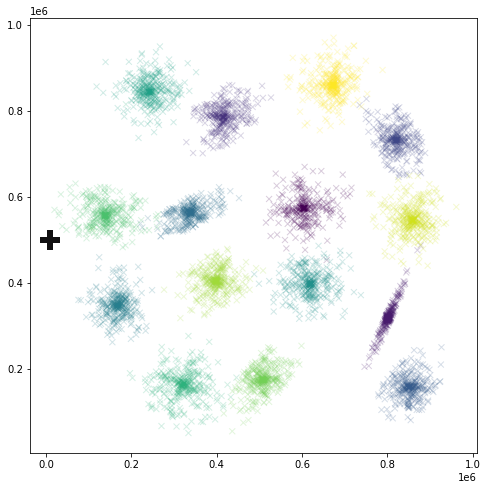

In [23]:
plt.figure(figsize=(8,8))
plt.scatter(df[0],df[1],c=df_labels.values.tolist(),marker='x',alpha=0.3,linewidth=1)
plt.scatter(point[0],point[1],c='#111011',marker='+',alpha=1.3,linewidth=20)

## 8. perform classification on the above dataset using KNN from sklearn (try different distance metrics and compare their results)

In [38]:
# Classification with help of manhatten distance 
classifier = KNeighborsClassifier(n_neighbors = 19,metric='manhattan')
classifier.fit(df,df_labels)
df_labels_pred = classifier.predict(df)
print(confusion_matrix(df_labels,df_labels_pred))

[[297   0   0   0   0   0   0   3   0   0   0   0   0   0   0]
 [  0 314   1   0   0   0   0   0   0   0   0   0   0   2   0]
 [  0   0 313   2   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 314   4   0   0   0   0   0   0   0   0   0   2]
 [  0   0   0   0 321   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 323   3   0   0   0   3   0   0   0   0]
 [  0   0   0   0   0   0 330   3   0   0   1   0   0   0   0]
 [  1   0   0   0   0   0   0 330   0   0   0   0   2   0   0]
 [  0   0   0   0   0   0   0   2 338   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   3 339   0   3   0   0   0]
 [  0   0   0   0   0   5   0   0   0   0 341   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   1 348   0   0   0]
 [  0   0   0   0   0   0   0   1   0   0   0   0 349   0   0]
 [  0   0   0   3   0   0   0   0   0   0   0   0   0 347   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 350]]


C:\Users\Checkout\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [39]:
print(classification_report(df_labels,df_labels_pred))

              precision    recall  f1-score   support

           1       1.00      0.99      0.99       300
           2       1.00      0.99      1.00       317
           3       1.00      0.99      1.00       315
           4       0.98      0.98      0.98       320
           5       0.99      1.00      0.99       321
           6       0.98      0.98      0.98       329
           7       0.99      0.99      0.99       334
           8       0.97      0.99      0.98       333
           9       0.99      0.99      0.99       340
          10       1.00      0.98      0.99       345
          11       0.99      0.99      0.99       346
          12       0.99      0.99      0.99       350
          13       0.99      1.00      1.00       350
          14       0.99      0.99      0.99       350
          15       0.99      1.00      1.00       350

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99   

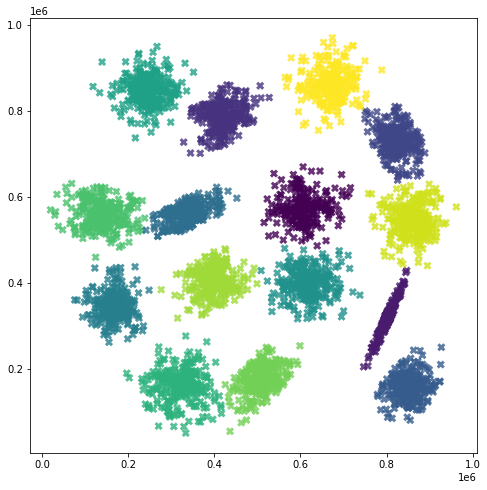

In [40]:
plt.figure(figsize=(8,8))
plt.scatter(df[0],df[1],c=df_labels_pred,marker='x',alpha=0.8,linewidth=3)

In [41]:
# Classification with help of euclidean distance 
classifier = KNeighborsClassifier(n_neighbors = 19,metric='euclidean')
classifier.fit(df,df_labels)
df_labels_pred = classifier.predict(df)
print(confusion_matrix(df_labels,df_labels_pred))

[[297   0   0   0   0   0   0   3   0   0   0   0   0   0   0]
 [  0 314   1   0   0   0   0   0   0   0   0   0   0   2   0]
 [  0   0 313   2   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 314   4   0   0   0   0   0   0   0   0   0   2]
 [  0   0   0   0 321   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 323   3   0   0   0   3   0   0   0   0]
 [  0   0   0   0   0   0 330   3   0   0   1   0   0   0   0]
 [  1   0   0   0   0   0   0 330   0   0   0   0   2   0   0]
 [  0   0   0   0   0   0   0   2 338   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   3 339   0   3   0   0   0]
 [  0   0   0   0   0   5   0   0   0   0 341   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   1 348   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 350   0   0]
 [  0   0   0   3   0   0   0   0   0   0   0   0   0 347   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 350]]


C:\Users\Checkout\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [46]:
print(classification_report(df_labels,df_labels_pred))

              precision    recall  f1-score   support

           1       1.00      0.99      0.99       300
           2       1.00      0.99      1.00       317
           3       1.00      0.99      1.00       315
           4       0.98      0.98      0.98       320
           5       0.99      1.00      0.99       321
           6       0.98      0.98      0.98       329
           7       0.99      0.99      0.99       334
           8       0.98      0.99      0.98       333
           9       0.99      0.99      0.99       340
          10       1.00      0.98      0.99       345
          11       0.99      0.99      0.99       346
          12       0.99      0.99      0.99       350
          13       0.99      1.00      1.00       350
          14       0.99      0.99      0.99       350
          15       0.99      1.00      1.00       350

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99   

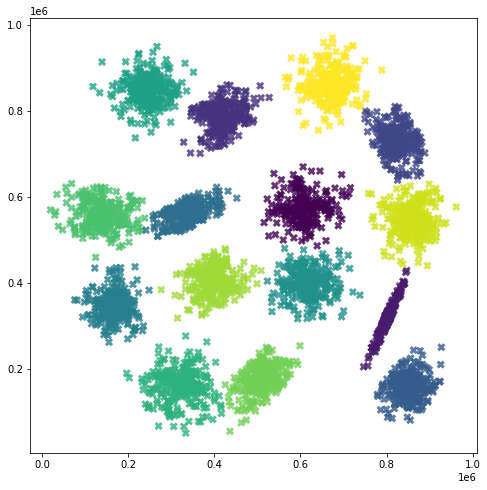

In [44]:
plt.figure(figsize=(8,8))
plt.scatter(df[0],df[1],c=df_labels_pred,marker='x',alpha=0.8,linewidth=3)

In [45]:
# Classification with minkowski distance
classifier = KNeighborsClassifier(n_neighbors = 19,metric='minkowski')
classifier.fit(df,df_labels)
df_labels_pred = classifier.predict(df)
print(confusion_matrix(df_labels,df_labels_pred))

[[297   0   0   0   0   0   0   3   0   0   0   0   0   0   0]
 [  0 314   1   0   0   0   0   0   0   0   0   0   0   2   0]
 [  0   0 313   2   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 314   4   0   0   0   0   0   0   0   0   0   2]
 [  0   0   0   0 321   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 323   3   0   0   0   3   0   0   0   0]
 [  0   0   0   0   0   0 330   3   0   0   1   0   0   0   0]
 [  1   0   0   0   0   0   0 330   0   0   0   0   2   0   0]
 [  0   0   0   0   0   0   0   2 338   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   3 339   0   3   0   0   0]
 [  0   0   0   0   0   5   0   0   0   0 341   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   1 348   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 350   0   0]
 [  0   0   0   3   0   0   0   0   0   0   0   0   0 347   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 350]]


C:\Users\Checkout\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [47]:
print(classification_report(df_labels,df_labels_pred))

              precision    recall  f1-score   support

           1       1.00      0.99      0.99       300
           2       1.00      0.99      1.00       317
           3       1.00      0.99      1.00       315
           4       0.98      0.98      0.98       320
           5       0.99      1.00      0.99       321
           6       0.98      0.98      0.98       329
           7       0.99      0.99      0.99       334
           8       0.98      0.99      0.98       333
           9       0.99      0.99      0.99       340
          10       1.00      0.98      0.99       345
          11       0.99      0.99      0.99       346
          12       0.99      0.99      0.99       350
          13       0.99      1.00      1.00       350
          14       0.99      0.99      0.99       350
          15       0.99      1.00      1.00       350

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99   

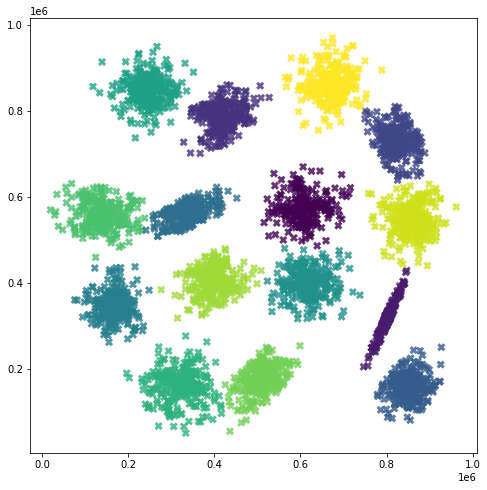

In [48]:
plt.figure(figsize=(8,8))
plt.scatter(df[0],df[1],c=df_labels_pred,marker='x',alpha=0.8,linewidth=3)

-->Using different distance almost gives similar results only

In [52]:
#Testing of the model
X_train, X_test, y_train, y_test = train_test_split(df,df_labels,test_size = 0.3)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

classifier = KNeighborsClassifier(n_neighbors = 16)
classifier.fit(X_train, y_train)

y_test_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_test_pred))

[[ 97   0   0   0   0   0   0   2   0   0   0   0   0   0   0]
 [  0  92   0   0   0   0   0   0   0   0   0   0   0   1   0]
 [  0   0  89   1   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  86   2   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 104   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  93   3   0   0   0   2   0   0   0   0]
 [  0   0   0   0   0   0  97   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  96   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 111   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 107   0   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0   0 103   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 103   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 109   0   0]
 [  0   0   0   1   0   0   0   0   0   0   0   0   0  94   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 105]]


C:\Users\Checkout\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [51]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        73
           2       1.00      0.99      1.00       110
           3       1.00      0.99      0.99        90
           4       0.96      0.96      0.96       105
           5       0.97      1.00      0.98        89
           6       1.00      0.98      0.99        99
           7       0.99      0.99      0.99        92
           8       0.98      1.00      0.99        92
           9       0.99      0.99      0.99        97
          10       1.00      0.99      1.00       107
          11       0.99      1.00      1.00       105
          12       1.00      1.00      1.00        97
          13       1.00      1.00      1.00       122
          14       0.99      0.97      0.98       111
          15       0.99      1.00      1.00       111

    accuracy                           0.99      1500
   macro avg       0.99      0.99      0.99      1500
weighted avg       0.99   

## 10. load and plot S2.txt

In [54]:
df2=pd.read_csv('S2.txt',sep='.   ',header=None,names=['0','1'])
df2

C:\Users\Checkout\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,0,1
0,62447,837604
1,67341,735362
2,64744,677000
3,53228,741384
4,64652,742844
...,...,...
4995,54011,671072
4996,50745,777031
4997,56926,738385
4998,44458,878830


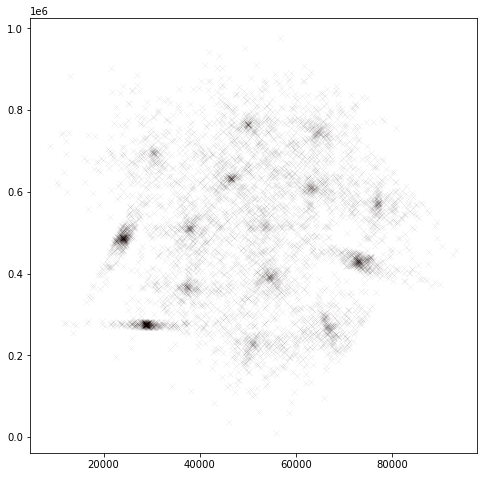

In [70]:
plt.figure(figsize=(8,8))
plt.scatter(df2['0'],df2['1'],marker='x',c='#100000',alpha=0.2,linewidth=0.2)

## 11. perform k means clustering on S2.txt without using any library and plot the results

In [ ]:
import random

def KMeans_clustering_training(data,k,no_of_epochs):
    dims = len(data[0])
    Min=min(min(data))
    Max=(max(max(data))-Min*40)
    print(Min,Max)
    centers = random_centers(dims,k,Min,Max)
    
    clustered_data = point_clustering(data, centers, dims, first_cluster=True)

    for i in range(no_of_epochs):
        centers = mean_centre(clustered_data, centers, dims)
        clustered_data = point_clustering(data, centers, dims, first_cluster=False)
    
    return centers,clustered_data

def mean_centre(data, centers, dims):
    new_centers = []
    for i in range(len(centers)):
        new_center = []
        n_of_points = 0
        total_of_points = []
        for point in data:
            if point[-1] == i:
                n_of_points += 1
                for dim in range(0,dims):
                    if dim < len(total_of_points):
                        total_of_points[dim] += point[dim]
                    else:
                        total_of_points.append(point[dim])
        if len(total_of_points) != 0:
            for dim in range(0,dims):
                new_center.append(total_of_points[dim]/n_of_points)
            new_centers.append(new_center)
        else: 
            new_centers.append(centers[i])
    return new_centers


def random_centers(dim,k,Min,Max):
    centers = []
    for i in range(k):
        center = []
        for d in range(dim):
            rand = random.randint(Min,Max)
            center.append(rand)
        centers.append(center)
    return centers

def KMeans_clustering_prediction(point, centers):
    dims = len(point)
    center_dims = len(centers[0])
    
    if dims != center_dims:
        raise ValueError('Point given for prediction have', dims, 'dimensions but centers have', center_dims, 'dimensions')

    nearest_center = None
    nearest_dist = None
    
    for i in range(len(centers)):
        euclidean_dist = 0
        for dim in range(1, dims):
            dist = point[dim] - centers[i][dim]
            euclidean_dist += dist**2
        euclidean_dist = np.sqrt(euclidean_dist)
        if nearest_dist == None:
            nearest_dist = euclidean_dist
            nearest_center = i
        elif nearest_dist > euclidean_dist:
            nearest_dist = euclidean_dist
            nearest_center = i
                 
    return nearest_center

def plot_scat(centers,Marker,C,Alpha,Linewidth):
  Cx=[]
  Cy=[]
  for i in range(len(centers)):
    Cx.append(centers[i][0])
    Cy.append(centers[i][1])
  plt.scatter(Cx,Cy,marker=Marker,c=C,alpha=Alpha,linewidth=Linewidth)
  pass


def point_clustering(data, centers, dims, first_cluster=False):
    for point in data:
        nearest_center = 0
        nearest_center_dist = None
        for i in range(0, len(centers)):
            euclidean_dist = 0
            for d in range(0, dims):
                dist = abs(point[d] - centers[i][d])
                euclidean_dist += dist
            euclidean_dist = np.sqrt(euclidean_dist)
            if nearest_center_dist == None:
                nearest_center_dist = euclidean_dist
                nearest_center = i
            elif nearest_center_dist > euclidean_dist:
                nearest_center_dist = euclidean_dist
                nearest_center = i
        if first_cluster:
            point.append(nearest_center)
        else:
            point[-1] = nearest_center
    
    return data

centers,clustered_data = KMeans_clustering_training(df2.values.tolist(),k=6,no_of_epochs=9)

print(clustered_data)


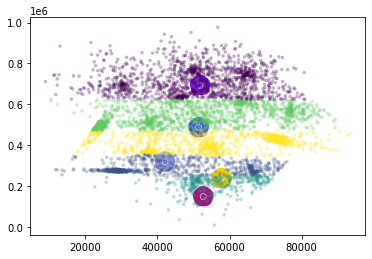

In [88]:
plt.figure()
plot_scat(centers,Marker='p',C=Colors,Alpha=1,Linewidth=15)
plot_scat(df2.values.tolist(),Marker='.',C=Clusters,Alpha=0.3,Linewidth=0.3)

## 12. perform k means clustering on S2.txt using sklearn library and plot the results

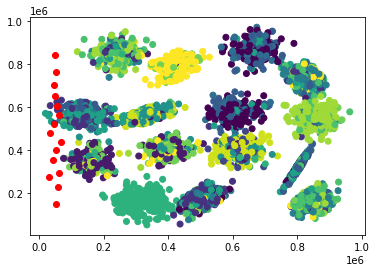

In [86]:
kmeans = KMeans(n_clusters =15,init='random',n_init=40,max_iter=50)
kmeans.fit(df2)
y_kmeans = kmeans.predict(df2)
plt.scatter(df[0],df[1], c = y_kmeans)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'red')